In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import swiss_roll_dataset_generator as roll_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [52]:
figure_num = 10**2
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_generator.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=5, c=10000, figures=figures, params=control_vars, params_names=param_names)


In [58]:
mcu_model.train(max_iters=300)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

rre_median_embedding_vs_params: 0.17285148352254653


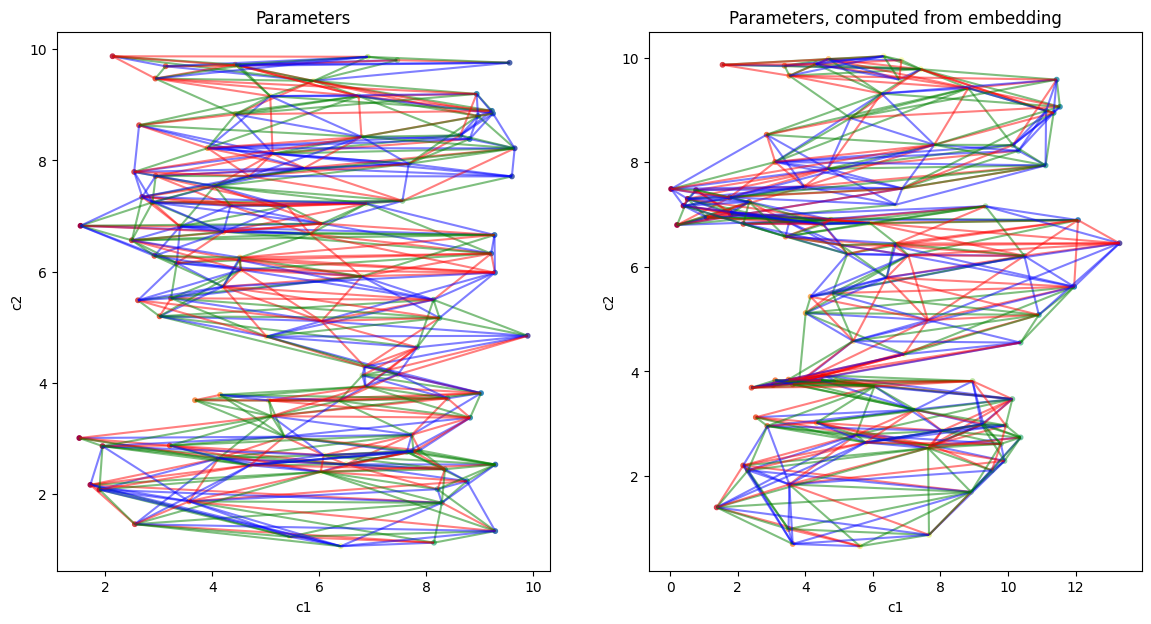

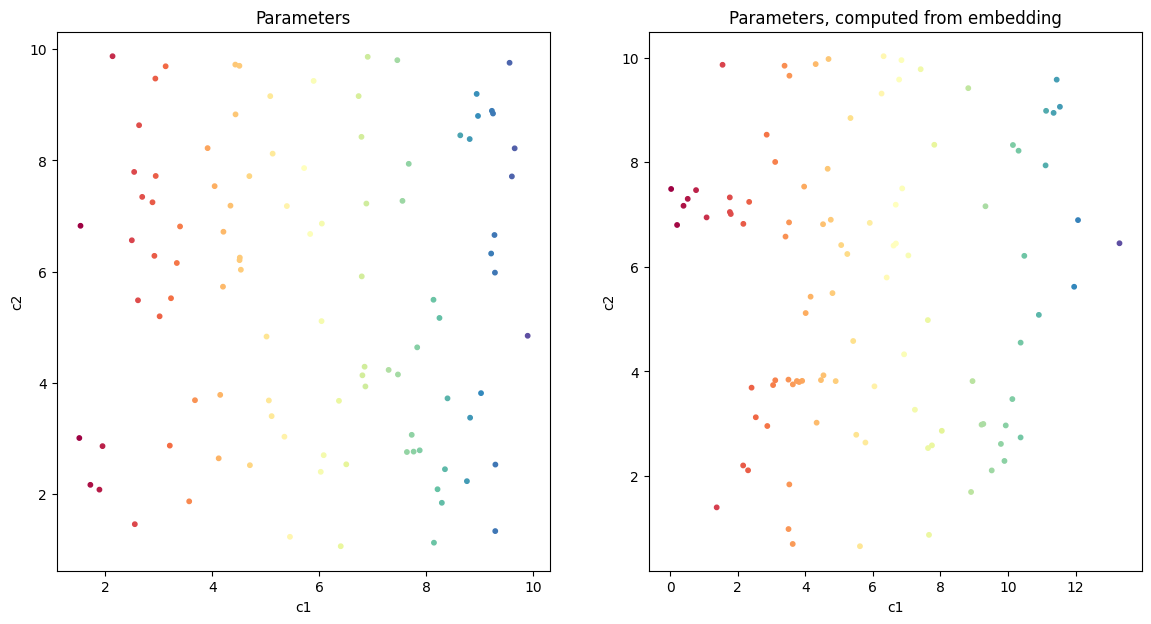

In [59]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [60]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt, noise_level, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 2 ms , optimization: 1 ms
-----------
x_opt  = [5.84209524 1.54092798], x_err = 255.48525058915624
x_real = [1.47714191 1.30586808]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [1.56205634 1.65570695], x_err = 58.618003489680845
x_real = [1.69858747 1.68867914]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [1.56205634 1.81694309], x_err = 29.793024711207977
x_real = [1.79084763 1.82782554]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [6.67884929 1.46776774], x_err = 238.13897981154565
x_real = [1.69697337 1.17768411]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [1.56205634 1.55548552], x_err = 114.54928424336046
x_real = [1.38786103 1.52487639]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [5.44975001 1.66376145], x_err = 249.86692573094854
x_real = [1.1921321  1.46530974]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [8.44797549 1.49181842], x_e

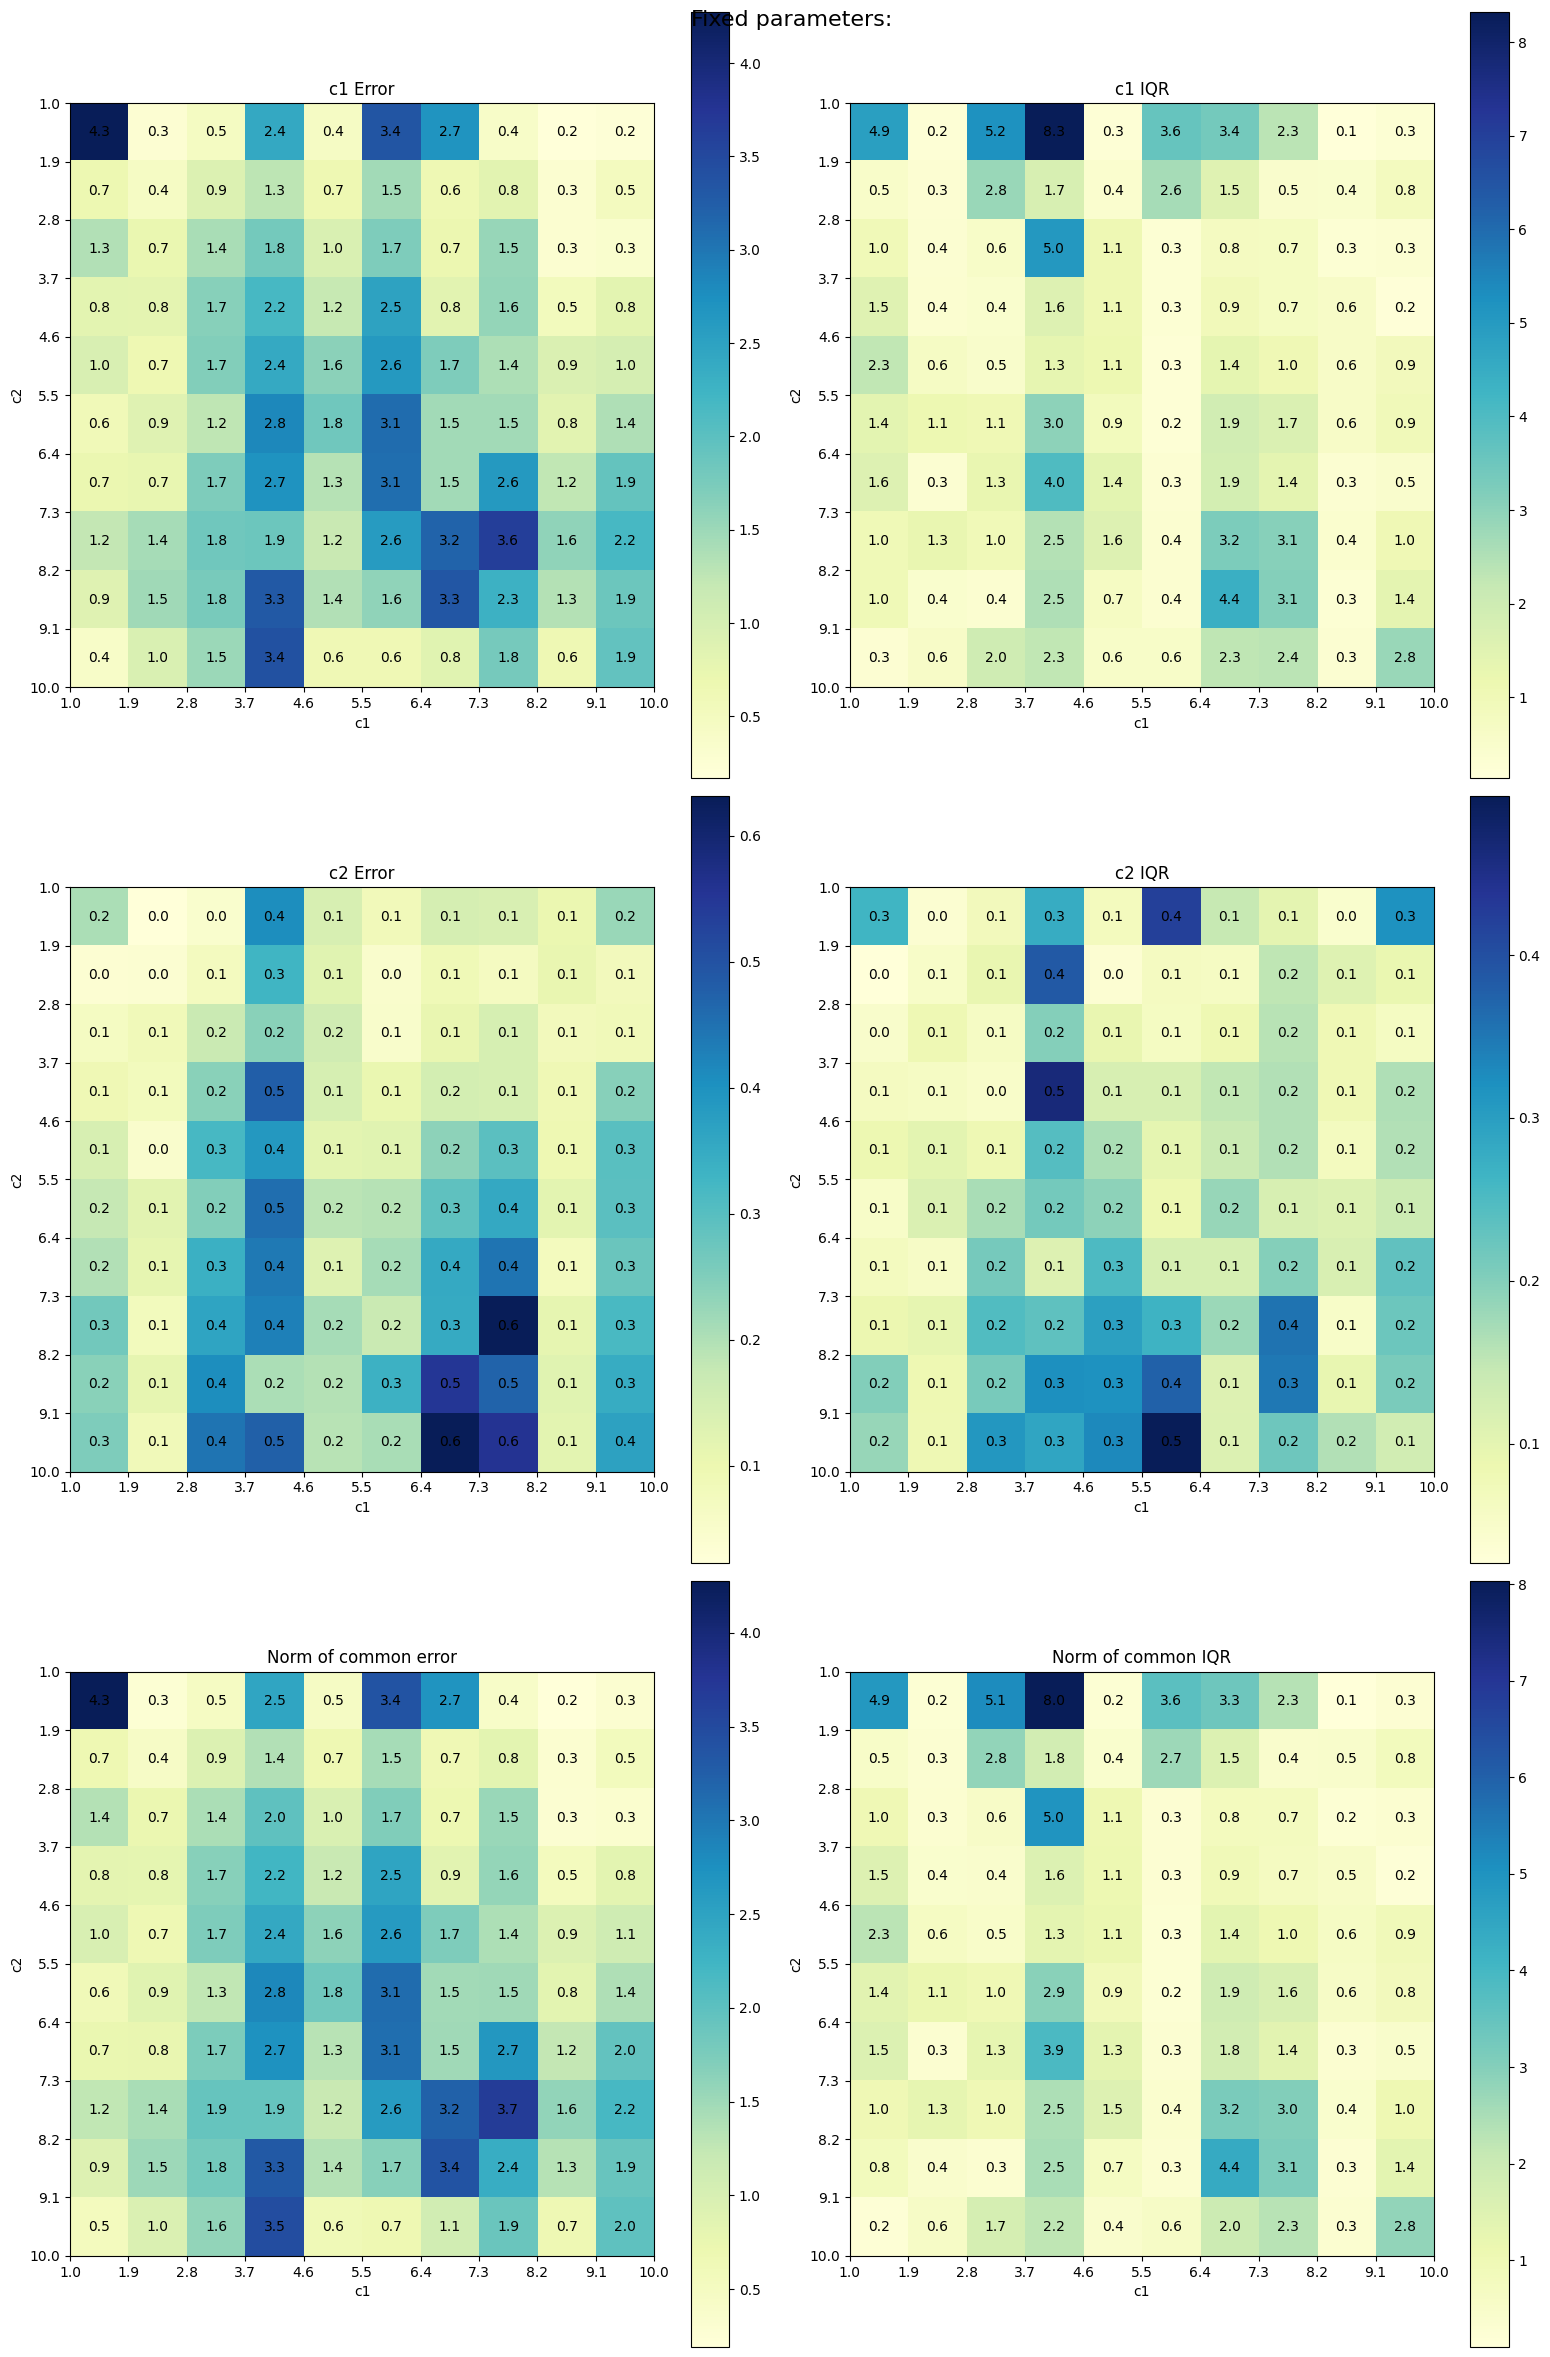

In [61]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs)